In [1]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import os

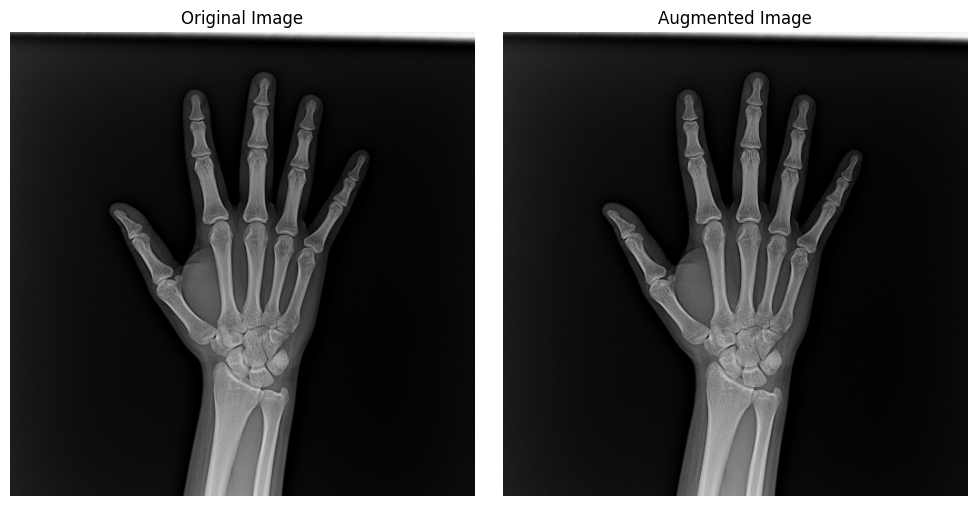

In [3]:
class CustomCenterCrop(A.ImageOnlyTransform):
    def __init__(self, height, width, shift_down_ratio, always_apply=False, p=1.0):
        super().__init__(always_apply, p)
        self.height = height
        self.width = width
        self.shift_down_ratio = shift_down_ratio  # 아래로 이동 비율 (0.2 = 20% 이동)

    def apply(self, img, **params):
        h, w, _ = img.shape
        # 중심 좌표 계산
        center_x = w // 2
        center_y = int(h // 2 + h * self.shift_down_ratio)  # 아래로 이동된 중심
        # 자를 영역 계산
        x1 = max(center_x - self.width // 2, 0)
        y1 = max(center_y - self.height // 2, 0)
        x2 = min(x1 + self.width, w)
        y2 = min(y1 + self.height, h)
        return img[y1:y2, x1:x2]


# 이미지 경로 설정 - ROOT 설정만 바꾸면 됨~
IMAGE_ROOT = "../test_data/"
image_path = os.path.join(IMAGE_ROOT, "test_16.png")

# Albumentations augmentation 함수 정의
def apply_augmentation(image, augmentation):
    augmented = augmentation(image=image)
    return augmented['image']

# augmentation 설정
augmentation = A.Compose([
    A.Resize(512,512),
    # A.OneOf([  # 변환 중 하나를 선택
    #     # A.CenterCrop(height=224, width=224, always_apply=True),  # CenterCrop
    #     # CustomCenterCrop(height=112, width=112, shift_down_ratio=0.2),
    #     # A.RandomCrop(height=512, width=512, always_apply=True),  # 대안으로 RandomCrop
    # ], p=1),  # CenterCrop이 50% 확률로 적
    A.Resize(512,512),

])

# 이미지 출력
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# augmentation 적용
augmented_image = apply_augmentation(image, augmentation)

# 원본 및 augmentation 비교 시각화
plt.figure(figsize=(10, 5))

# 원본 이미지 표시
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# augmentation 이미지 표시
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()